<Body>   
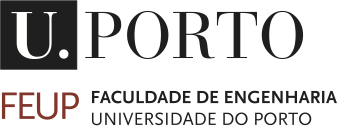   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **May 20** in your corresponding practical class. Upload the files until 23:59 of **May 31, 2024**.


---



# **Identification**

* **Group:** Project_A02_A
* **Name:** Sename Grégoire
* **Student Number:** up202311020

* **Name:** Tancredi Matteo
* **Student Number:**  up202311682


---



**Initial setup:** To download the data files, run the next cell.

In [47]:
# !wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
# !unzip data-setMLproject2.zip -d.


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [48]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
df_test2obs

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,7.90,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,7.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,7.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,7.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ taken at time $t=1.0\,s$.


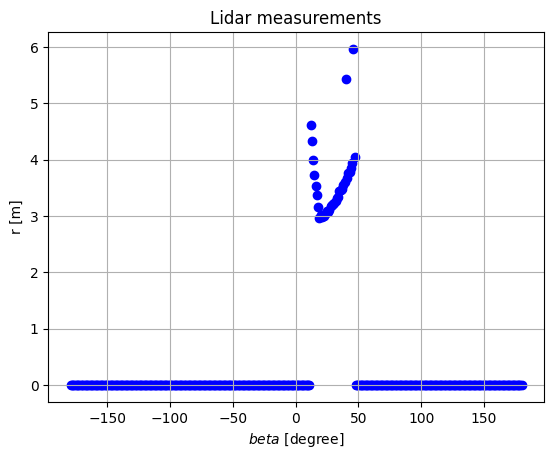

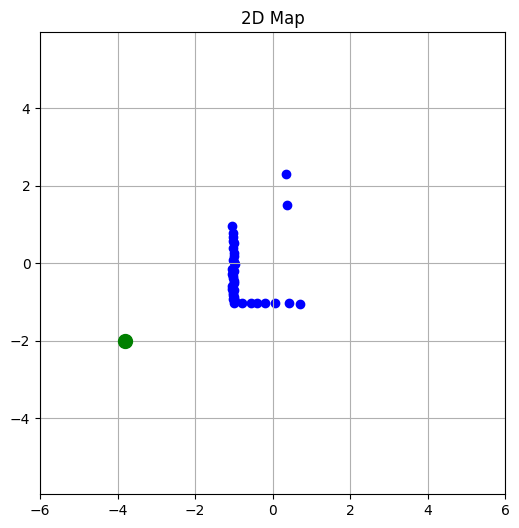

In [49]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map')
plt.show()

Note that it may be possible to have more than one object in the range of the LIDAR. \\
Here goes an example when $t=32\,s$:


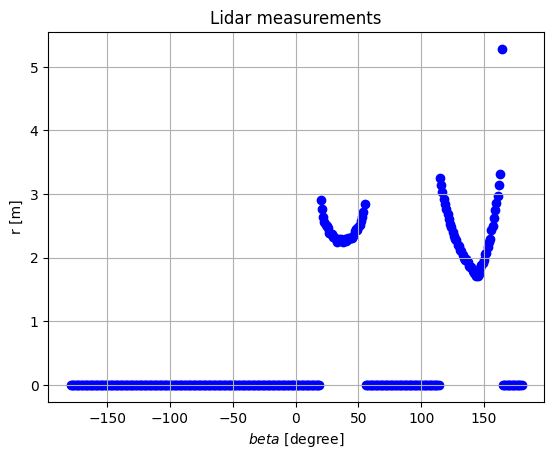

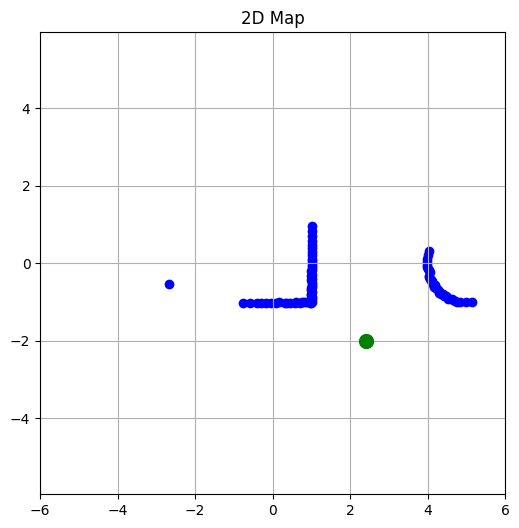

In [50]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ \\
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. \\
All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

In [51]:
import pandas as pd
df_train = pd.read_csv('data_train.csv', index_col=0)
df_train

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.06,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.48,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.58,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.10,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.48,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.60,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2236,-2.12,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2237,-2.80,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2238,1.18,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [52]:
import pandas as pd
df_test = pd.read_csv('data_test.csv', index_col=0)
df_test

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.46,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
1,0.38,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,2.58,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,-2.84,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
4,-2.56,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,3.32,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.752938,2.789123,2.869662,2.960473,3.041882,3.292784,0.0,0.0,0.0,1.0
956,3.62,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
957,2.20,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.381054,1.557405,1.728042,2.111385,2.553902,0.000000,0.0,0.0,0.0,2.0
958,-2.98,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. \\
Do not use sklearn or similar packages (use the results of notebook #7).

In [53]:
# To complete

X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# KNN

def vector2norm(x, data):
  npoints = data.shape[0]
  distances = np.zeros(npoints)
  for i in range(npoints) :
     distances[i] = np.linalg.norm(x-data[i,:-1])
  return distances


def kNN_classifier(k,x,data):
  npoints = data.shape[0]
  # compute distance to training points
  dist = vector2norm(x,data)
  
  # sort along increasing distances
  ind = np.argsort(dist,axis=0)
  classes = data[:,-1]
  classes_sorted = classes[ind]
  # determine class with more element in the k neighborhood
  
  c1 = 0
  c2 = 0
  for i in range(k):
    if classes_sorted[i]==1:
      c1 +=1
    else:
      c2 +=1
  if c1>c2:
    return 1
  else:
    return 2
  
x0 = np.zeros(X_train.shape[1])
kNN_classifier(3,x0,data_train)



# dist = vector2norm(X_train[0,:],data_train)
# plt.figure()
# plt.scatter(range(len(dist)),dist)
# plt.plot()
# plt.xlabel('dataset index')
# plt.ylabel('distance')
# plt.show()



1

**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ \\
Note that accuracy is defined as
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.


In [54]:
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

In [55]:
# Define a function to calculate accuracy
def calculate_accuracy(predictions, labels):
    correct_predictions = np.sum(predictions == labels)
    total_predictions = len(labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Check for all training data
data_train = np.append(X_train, np.reshape(Y_train, (len(Y_train), 1)), axis=1)
k_values = [1, 3, 5, 7, 9]

# accuracy = 1 when k = 1 because the nearest point is the point itself
for k in k_values:
    classification_train = [kNN_classifier(k, X_train[t], data_train) for t in range(len(X_train))]
    accuracy_train = calculate_accuracy(np.array(classification_train), Y_train)
    print(f"Accuracy of k-NN model on training data with k={k}: {100.0*accuracy_train:4.2f}%")

# Check for all testing data
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

for k in k_values:
    classification_test = [kNN_classifier(k, X_test[t], data_test) for t in range(len(X_test))]
    accuracy_test = calculate_accuracy(np.array(classification_test), Y_test)
    print(f"Accuracy of k-NN model on testing data with k={k}: {100.0*accuracy_test:4.2f}%")


Accuracy of k-NN model on training data with k=1: 100.00%
Accuracy of k-NN model on training data with k=3: 99.87%
Accuracy of k-NN model on training data with k=5: 99.64%
Accuracy of k-NN model on training data with k=7: 99.82%
Accuracy of k-NN model on training data with k=9: 99.78%
Accuracy of k-NN model on testing data with k=1: 100.00%
Accuracy of k-NN model on testing data with k=3: 100.00%
Accuracy of k-NN model on testing data with k=5: 99.17%
Accuracy of k-NN model on testing data with k=7: 98.85%
Accuracy of k-NN model on testing data with k=9: 97.29%


**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function;

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set. \\
**Do not use** PyTorch, TensorFlow or similar packages (check notebook #8). \\
**Tip:** It is important to shuffle the training data. You may get better results with non constant learning rate. A final loss below 0.05 is good!


In [56]:
# To complete

import numpy as np
np.random.seed(42)

N_INPUTS = 10  #Number of inputs

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def relu(x):
    return np.maximum(0, x)

def deriv_relu(x):
    return np.where(x > 0, 1, 0)

class NeuralNetwork:
    def __init__(self):
        # Biases
        self.b1 = np.random.randn(5)
        self.bo = np.random.randn()

        # Weights
        self.wi = np.random.randn(5, N_INPUTS)
        self.who = np.random.randn(5)

    def feedforward(self, x):
        self.sum_h = np.dot(self.wi, x) + self.b1
        self.h = relu(self.sum_h)

        self.sum_o = np.dot(self.who, self.h) + self.bo
        self.o = sigmoid(self.sum_o)
        return self.o

    def train(self, data, y_trues, learn_rate=0.1, epochs=500):
        loss_prev = 10000
        for epoch in range(epochs):
            for x, y_true in zip(data, y_trues):
                y_pred = self.feedforward(x)

                # Partial derivatives.
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Output Layer: Neuron o1
                d_ypred_d_who = self.h * deriv_sigmoid(self.sum_o)
                d_ypred_d_bo = deriv_sigmoid(self.sum_o)

                d_ypred_d_h = self.who * deriv_sigmoid(self.sum_o)

                # Hidden Layer
                d_h_d_wi = np.dot(np.reshape(deriv_relu(self.sum_h), (5, 1)), np.reshape(x, (1, N_INPUTS)))
                d_h_d_b1 = deriv_relu(self.sum_h)

                # Gradient Descent
                self.who -= learn_rate * d_L_d_ypred * d_ypred_d_who
                self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

                for i in range(5):
                    self.wi[i] -= learn_rate * d_L_d_ypred * d_ypred_d_h[i] * d_h_d_wi[i]
                    self.b1[i] -= learn_rate * d_L_d_ypred * d_ypred_d_h[i] * d_h_d_b1[i]

            if epoch % 5 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(y_trues, y_preds)
                print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
                if loss > loss_prev and learn_rate > 0.002:
                    learn_rate *= 0.9
                    print("Epoch %d  --> Adjusted learn_rate: %.6f" % (epoch, learn_rate))
                loss_prev = loss

# Create the ANN
model = NeuralNetwork()

# Build the training set (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
    j = 0
    for i in range(360):
        if X_train[t][i] > 0 and j < N_INPUTS:
            trainingset_X[t][j] = X_train[t][i]
            j += 1

# Training set: here the labels are 0 or 1
trainingset_Y = Y_train - 1

# Shuffle the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

# Train the ANN
model.train(trainingset_X, trainingset_Y, learn_rate=0.05, epochs=1000)


Epoch 0  --> Loss: 0.2513
Epoch 5  --> Loss: 0.2509
Epoch 10  --> Loss: 0.2507
Epoch 15  --> Loss: 0.2506
Epoch 20  --> Loss: 0.2507
Epoch 20  --> Adjusted learn_rate: 0.045000
Epoch 25  --> Loss: 0.2506
Epoch 30  --> Loss: 0.2504
Epoch 35  --> Loss: 0.2504
Epoch 35  --> Adjusted learn_rate: 0.040500
Epoch 40  --> Loss: 0.2501
Epoch 45  --> Loss: 0.2501
Epoch 50  --> Loss: 0.2501
Epoch 55  --> Loss: 0.2500
Epoch 60  --> Loss: 0.2500
Epoch 65  --> Loss: 0.2499
Epoch 70  --> Loss: 0.2499
Epoch 75  --> Loss: 0.2499
Epoch 80  --> Loss: 0.2499
Epoch 85  --> Loss: 0.2499
Epoch 90  --> Loss: 0.2499
Epoch 90  --> Adjusted learn_rate: 0.036450
Epoch 95  --> Loss: 0.2497
Epoch 100  --> Loss: 0.2497
Epoch 105  --> Loss: 0.2496
Epoch 110  --> Loss: 0.2495
Epoch 115  --> Loss: 0.2493
Epoch 120  --> Loss: 0.2465
Epoch 125  --> Loss: 0.2413
Epoch 130  --> Loss: 0.2360
Epoch 135  --> Loss: 0.2360
Epoch 140  --> Loss: 0.2356
Epoch 145  --> Loss: 0.2343
Epoch 150  --> Loss: 0.2349
Epoch 150  --> Adjuste

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write in a brief sentence of the main conclusions about the classifiers (k-NN and ANN) until this point.

In [57]:
# Evaluation with the Training set
classification_train = []
for t in range(len(Y_train)):
    classification_train.append(model.feedforward(trainingset_X[t]))

classification_train = np.array(classification_train)
error_clas_train = 0
for t in range(len(classification_train)):
    if (classification_train[t] >= 0.5 and trainingset_Y[t] != 1) or (classification_train[t] < 0.5 and trainingset_Y[t] != 0):
        error_clas_train += 1

accuracy_train = 1 - error_clas_train / len(Y_train)
print("Number of misclassified samples in the training data:", error_clas_train, "out of", len(Y_train))
print(f"Accuracy of the model on training data: {100.0 * accuracy_train:4.2f}%")

# Evaluation with the Testing set
test_set_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
    j = 0
    for i in range(360):
        if X_test[t][i] > 0 and j < N_INPUTS:
            test_set_X[t][j] = X_test[t][i]
            j += 1

classification_test = []
for t in range(len(Y_test)):
    classification_test.append(model.feedforward(test_set_X[t]))

classification_test = np.array(classification_test)
error_clas_test = 0
for t in range(len(classification_test)):
    if (classification_test[t] >= 0.5 and (Y_test[t] - 1) != 1) or (classification_test[t] < 0.5 and (Y_test[t] - 1) != 0):
        error_clas_test += 1

accuracy_test = 1 - error_clas_test / len(Y_test)
print("Number of misclassified samples in the testing data:", error_clas_test, "out of", len(Y_test))
print(f"Accuracy of the model on testing data: {100.0 * accuracy_test:4.2f}%")


Number of misclassified samples in the training data: 118 out of 2240
Accuracy of the model on training data: 94.73%
Number of misclassified samples in the testing data: 59 out of 960
Accuracy of the model on testing data: 93.85%


# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for
1. $t=1\,s$ (which has only one object) and
2. for $t=32\,s$ (which has 2 objects).

What can you conclude? \\
Do not use sklearn or similar packages (use the results of notebook #10).


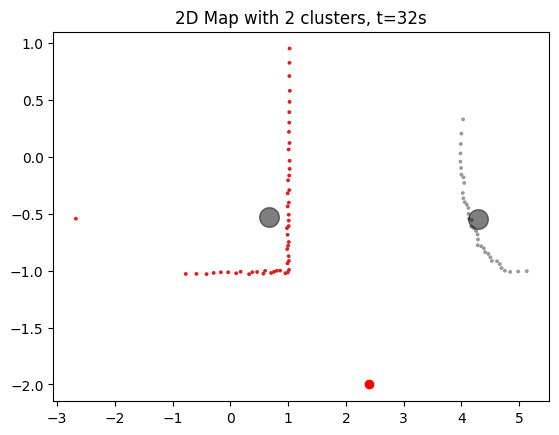

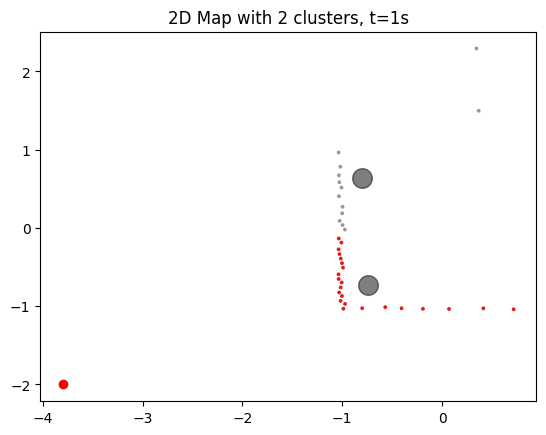

In [58]:
# To complete

def kmeans_func(X_func, K_func, show_plot=0, ini_method=0):
  '''
    X_func are sample points;
    K_func is the number of clusters;
    showplot 0/1 - not / show centroid evolution over iterations;
    ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
  '''
  cluster = np.zeros(X_func.shape[0],dtype=int)
  centr_ini = []
  if ini_method:  # 1 is points, 0 is random
    # Initial centroids are sample points (risky!)
    for i in range(K_func):
      centr_ini.append(X_func[i])
  else:
    # Non absurd Random Initial Centroids
    max0 = max(X_func[:,0])
    min0 = min(X_func[:,0])
    max1 = max(X_func[:,1])
    min1 = min(X_func[:,1])

    for i in range(K_func):
      centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

  iter = 0
  diff = 1
  centroids = centr_ini
  centr_list = [centroids]
  while diff > 0.001:
    iter += 1
    # Assign each point to the nearest centroid
    for i in range(X_func.shape[0]):
      dist = np.zeros(K_func)
      for j in range(K_func):
        dist[j] = np.linalg.norm(X_func[i]-centroids[j])
      cluster[i] = np.argmin(dist)

    # Calculate the new centroids
    new_centroids = np.zeros((K_func,2))
    for i in range(K_func):
      new_centroids[i] = np.mean(X_func[cluster==i],axis=0)

    diff = np.linalg.norm(np.array(centroids)-new_centroids)
    centroids = new_centroids
    centr_list.append(centroids)

  
  return centroids, cluster

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values
#Build the cloud points in 2D map
x_o, y_o = [], []

t=32*10
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))



X = np.array([x_o, y_o]).T
centr, clust = kmeans_func(X, 2, show_plot=1, ini_method=0)
plt.figure()
plt.title('2D Map with 2 clusters, t=32s')
plt.scatter(X[:, 0], X[:, 1], c=clust, s=3, cmap='Set1')
plt.scatter(centr[:, 0], centr[:, 1], c='black', s=200, alpha=0.5)

plt.scatter(px[t], py[t], color='r')


#Build the cloud points in 2D map
x_o, y_o = [], []

t=1*10
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))



X = np.array([x_o, y_o]).T
centr, clust = kmeans_func(X, 2, show_plot=1, ini_method=0)
plt.figure()
plt.title('2D Map with 2 clusters, t=1s')
plt.scatter(X[:, 0], X[:, 1], c=clust, s=3, cmap='Set1')
plt.scatter(centr[:, 0], centr[:, 1], c='black', s=200, alpha=0.5)

plt.scatter(px[t], py[t], color='r')

We can see that the k-means algorithm is able to separate the data into two clusters. At t=32s, we have indeed two objects, a circle and a square. The k-means algorithm is able to separate the data into two clusters, one for each object. At t=1s, we have only one object, a square, and the k-means algorithm is still able to separate the data into two clusters but the separation is not as clear as at t=32s.

**2.2**
Using the previous results,
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?

/var/folders/6g/c6ck6cxn66n9l_f46bw3g2t40000gn/T/ipykernel_5335/2997341180.py:16: RuntimeWarning: invalid value encountered in sqrt
  sum += np.sqrt((centroids[cluster[i], 0]-val[0])*2 +(centroids[cluster[i], 1]-val[1])*2)  ####
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/6g/c6ck6cxn66n9l_f46bw3g2t40000gn/T/ipykernel_5335/2997341180.py:63: RuntimeWarning: invalid value encountered in sqrt
  X_feature1[j1]=np.sqrt((X[i, 0]-px[t])*2 + (X[i, 1]-py[t])*2)


Number of misclassified samples in the new test data:  6 in 33
Accuracy of the model on new test data: 81.82%


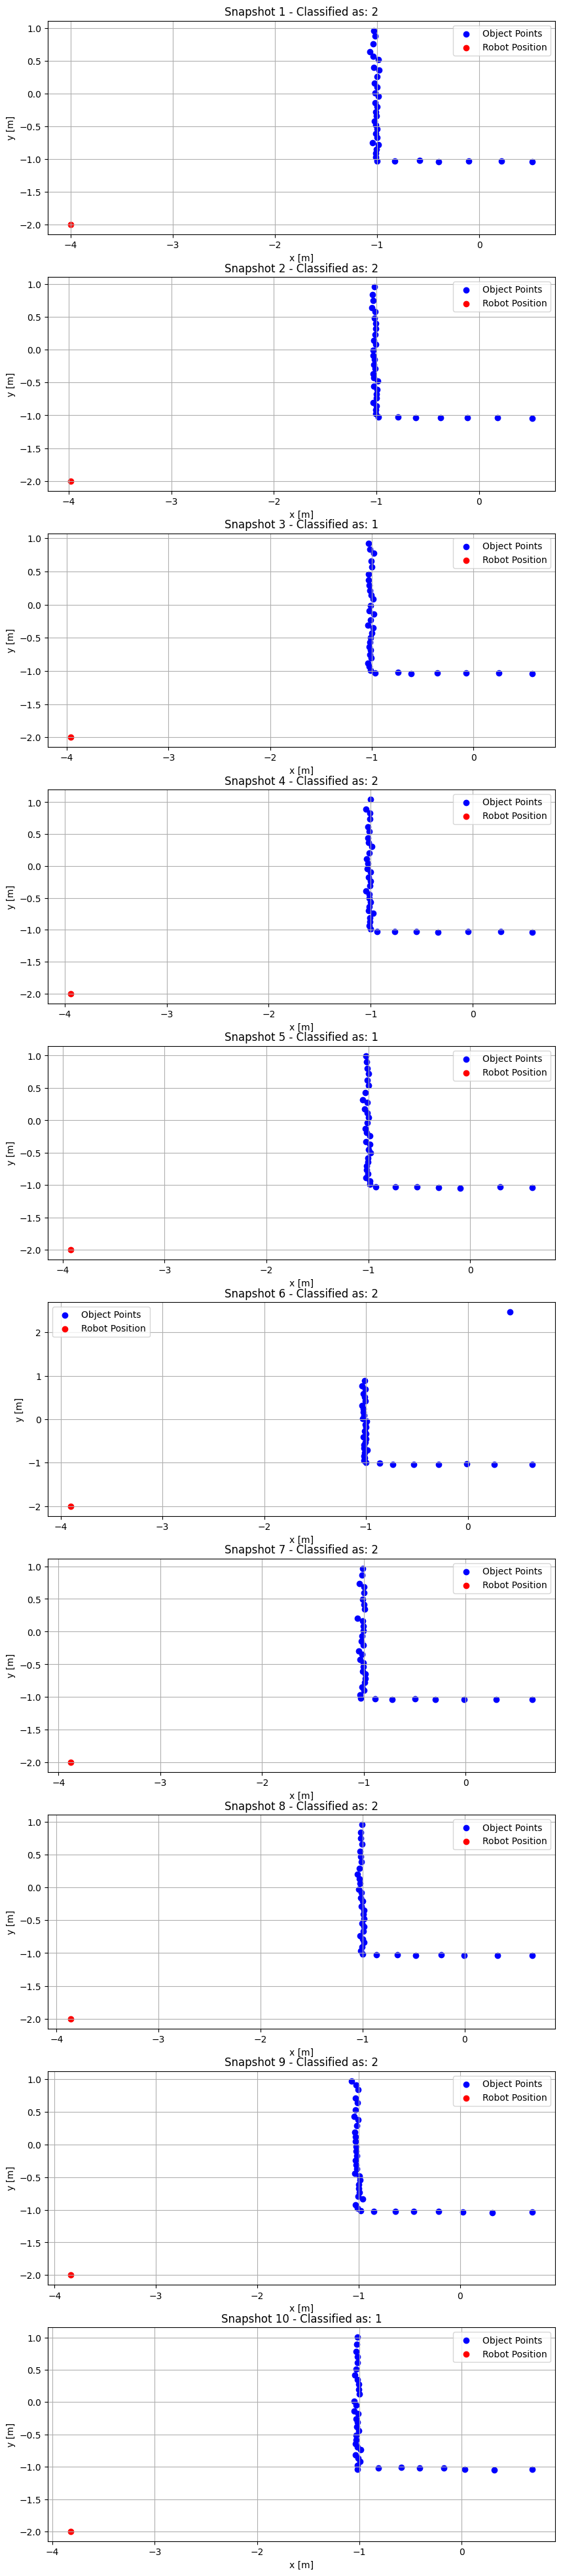

In [75]:
threshold = 0.5  # to decide if k=1 or k=2,

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

def SSE(X, centroids, cluster):
  '''
    returns the Sum of Squared Error
    X are the 2D points
    centroids are the cluster centers
    cluster is the cluster that each data point belongs to
  '''
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[cluster[i], 0]-val[0])*2 +(centroids[cluster[i], 1]-val[1])*2)  ####
  return sum

# Building the data set for ANN testing using k-means to split objects

test_set_X = np.array([])
N_INPUTS_2 = 360

for t in range(len(Lidar_range)):
  x_o, y_o = [], []
  for i in range(len(Lidar_range[t])):
    if Lidar_range[t][i] > 0:
      x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
      y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))
  X = np.array([x_o, y_o]).T

  cost_list = []
  k_range = range(1, 3)
  for k in k_range:
    centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0)
    # Calculate SSE
    cost = SSE(X, centr, clust)
    cost_list.append(cost)
  #Let's now decide if this snapshot has 1 or 2 obstacles
  if cost_list[0] / cost_list[1] > threshold:
    #2 objects
    X_feature1, X_feature2 = np.zeros([N_INPUTS_2]), np.zeros([N_INPUTS_2])
    j1,j2=0,0
    for i in range(len(X)):
      if j1 < N_INPUTS_2:
        if clust[i] == 0:
          X_feature1[j1]=np.sqrt((X[i, 0]-px[t])*2 + (X[i, 1]-py[t])*2)
          j1=j1+1
      if j2 < N_INPUTS_2:
        if clust[i] == 1:
          X_feature2[j2]=np.sqrt((X[i, 0]-px[t])*2 + (X[i, 1]-py[t])*2)
          j2=j2+1
    if len(test_set_X) == 0:
      test_set_X = np.array([X_feature1, X_feature2])
    else:
       test_set_X = np.concatenate((test_set_X, np.array([X_feature1, X_feature2])), axis=0)
  else: #only one object
    X_feature1 = np.zeros([N_INPUTS_2])
    j1=0
    for i in range(len(X)):
      if j1 < N_INPUTS_2:
        if clust[i] == 0:
          X_feature1[j1]=np.sqrt((X[i, 0]-px[t])*2 + (X[i, 1]-py[t])*2)
          j1=j1+1
    if len(test_set_X) == 0:
      test_set_X = np.array([X_feature1])
    else:
      test_set_X = np.concatenate((test_set_X, np.array([X_feature1])), axis=0)


# ANN Classifier

# Determine the number of clusters for each snapshot based on the clustering results
new_Y = []
for clust_local in range(len(clust)):
    if clust[clust_local] == 1:
        new_Y.append(1)  # Single object
    else:
        new_Y.append(2)

#first 10 nonzero elements for model
input_number = 10
test_set_X_nonzero = np.zeros([len(new_Y), input_number])
for t in range(len(new_Y)):
    j = 0
    for i in range(360):
        if test_set_X[t][i] > 0:
            if j < input_number:
                test_set_X_nonzero[t][j] = test_set_X[t][i]
                j += 1

classification = []
for x in test_set_X_nonzero:
    classification.append(model.feedforward(x))
classification = np.array(classification)

# Calculate the number of misclassified samples
error_clas = 0
for t in range(len(classification)):
    if (classification[t] >= 0.5) and (new_Y[t] == 0):
        error_clas += 1
    if (classification[t] < 0.5) and (new_Y[t] == 1):
        error_clas += 1
print("Number of misclassified samples in the new test data: ", error_clas, "in", len(new_Y))
acc = 1 - error_clas / len(new_Y)
print(f"Accuracy of the model on new test data: {100.0 * acc:4.2f}%")


# Plot the position of the robot and classified objects for some snapshots
def plot_snapshots(snapshots, classifications, px, py):
    fig, ax = plt.subplots(len(snapshots), figsize=(10, len(snapshots) * 5))

    for i in range(len(snapshots)):
      #calculating 2D map of LIDAR meassurement
        x_1, y_1 = [], []
        for z in range(len(snapshots[i])):
          if Lidar_range[i][z] > 0:
            x_1.append(px[i]+Lidar_range[i][z]*np.cos(angle[z]/180*np.pi))
            y_1.append(py[i]+Lidar_range[i][z]*np.sin(angle[z]/180*np.pi))
        #plotting 2D map of LIDAR and Robot position for snapshot
        ax[i].scatter(x_1[:], y_1[:], c='blue', label='Object Points')
        ax[i].scatter(px[i], py[i], c='red', label='Robot Position')
        ax[i].set_title(f'Snapshot {i+1} - Classified as: {"2" if classifications[i] >= 0.5 else "1"}')
        ax[i].set_xlabel('x [m]')
        ax[i].set_ylabel('y [m]')
        ax[i].grid()
        ax[i].legend()
    plt.show()

# Plot the first 10 snapshots

plot_snapshots(test_set_X[:10], classification[:10], px[:10], py[:10])

**2.3 (Extra)**
Using now PyTorch or other similar package, implement a better ANN (meaning with a better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [74]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Load the training and testing data
df_train = pd.read_csv('data_train.csv', index_col=0)
df_test = pd.read_csv('data_test.csv', index_col=0)

# Separate features and labels
X_train = df_train.iloc[:, 2:-1].values
y_train = df_train['label'].values
X_test = df_test.iloc[:, 2:-1].values
y_test = df_test['label'].values

# Check the unique classes
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure labels are sequential starting from 0
y_train -= y_train.min()
y_test -= y_test.min()

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Determine the number of classes
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}')

# Define the neural network
class ANN(nn.Module):
    def __init__(self, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # Output layer adjusted for num_classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
new_model = ANN(num_classes=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(new_model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    new_model.train()
    optimizer.zero_grad()
    outputs = new_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
new_model.eval()
with torch.no_grad():
    outputs = new_model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')

with torch.no_grad():
    outputs = new_model(X_train)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_train).sum().item() / y_train.size(0)
    print(f'Accuracy on training data: {accuracy * 100:.2f}%')
    





Unique classes in y_train: [1. 2.]
Unique classes in y_test: [1. 2.]
Number of classes: 2
Epoch [10/100], Loss: 0.6091
Epoch [20/100], Loss: 0.4136
Epoch [30/100], Loss: 0.2341
Epoch [40/100], Loss: 0.1232
Epoch [50/100], Loss: 0.0725
Epoch [60/100], Loss: 0.0491
Epoch [70/100], Loss: 0.0351
Epoch [80/100], Loss: 0.0254
Epoch [90/100], Loss: 0.0198
Epoch [100/100], Loss: 0.0169
Accuracy: 98.85%
Accuracy on training data: 99.20%
